# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.index = np.arange(1, len(student_data) + 1)
student_data.index.name = 'StudenID'
student_data

,Age,Tardies
StudenID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

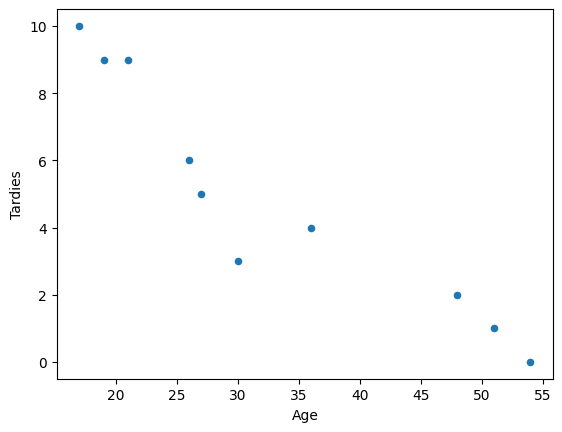

In [3]:
# Your code here.
student_data.plot.scatter(x="Age",
                         y="Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**Response** </br>
We can observe that there might be a negative linar trend between these two variables. As ages increase, it appears that the number os tardies trend to decrease. </br>


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
print(f'Correlation: {student_data["Age"].corr(student_data["Tardies"])}')
#covariance:
print(f'Covariation: {np.cov(student_data["Age"], student_data["Tardies"])}')

Correlation: -0.9391626886887122
Covariation: [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


**Comments** </br>
With a correlation coefficient near to -1 we can conclude that there is a **strong negative correlation** between ages and the number of tardies. (align with we see on the plot)</br>


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
x= student_data[["Age"]]
y= student_data["Tardies"]
model = linear_model.LinearRegression()


In [6]:
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

12.888803363135771

array([-0.24282077])

**Comments** </br>
I apply a simple linear regression model to predict the linear relationship between the variables age and tardiness. </br>
array([-0.24282077]) means that for each year increase in age, the predicted tardiness decreases by about 0.24.

Plot your regression model on your scatter plot.

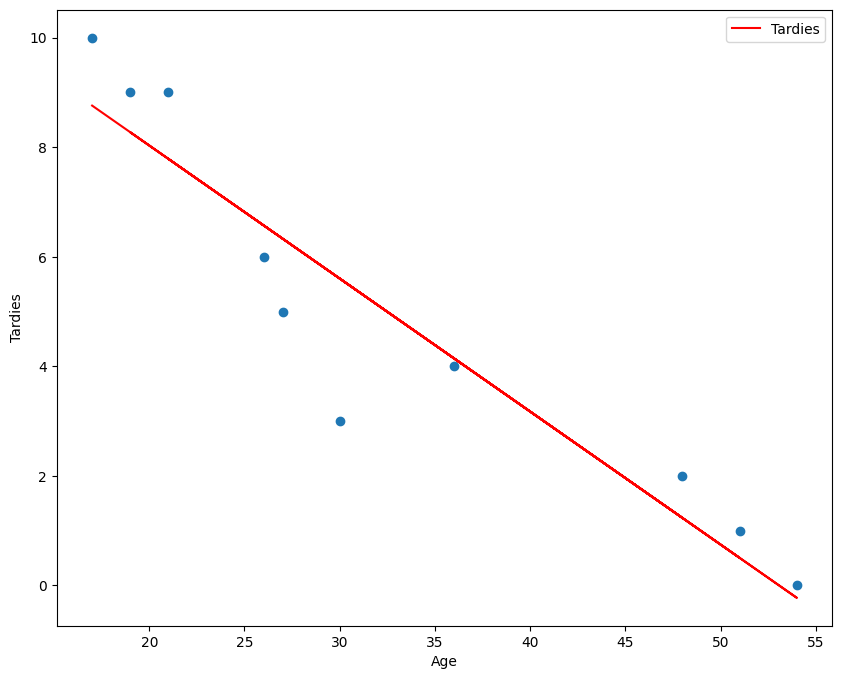

In [7]:
# Your code here.

regression_line = result.intercept_ + result.coef_[0]*x
plt.figure(figsize=(10,8))
plt.plot(x, regression_line, c = 'red', label= "Tardies")
plt.xlabel('Age')
plt.ylabel("Tardies")
plt.legend()
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
#Root Mean Squared Error (predicted values vs actual) 
pred = model.predict(x)
np.sqrt(mean_squared_error(pred, y))

1.1540884648655088

Given the strong negative correlation coefficient, the negative covariance, and the plot that shows a downward-sloping regression line, we can be relatively confident in concluding that age is a significant predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_df = vehicles[selected_variables]

# Calculate correlations
correlation_matrix = selected_df.corr()

# Display correlation matrix
correlation_matrix

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


The variable that is most strongly correlated with 'CO2 Emission Grams/Mile' is 'Fuel Barrels/Year' with a correlation coefficient of approximately 0.986. This indicates a very strong positive correlation. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here. 
x =vehicles[['Year', 'Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']
model= linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9808734920269122

In [12]:
pred= model.predict(x)
np.sqrt(mean_squared_error(y,pred))

16.465711496024085

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# Your response here. 

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here.
import pandas as pd

parties = {"Invite": [1,3,4,6,8,9,11,14],
              "Attend": [1,2,4,4,5,7,8,13]}
parties_df = pd.DataFrame(parties)
parties_df

,Invite,Attend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

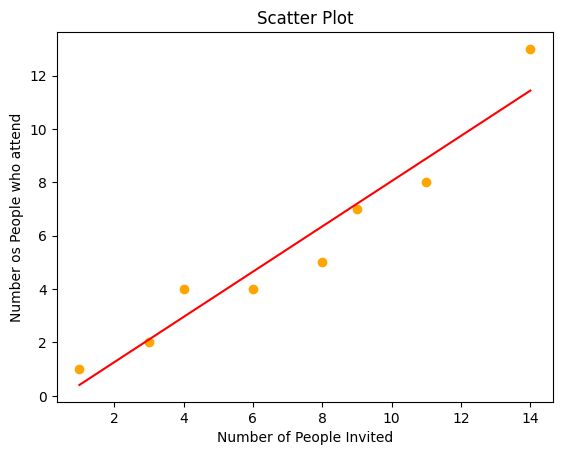

In [15]:
# Your code here.
x= parties_df[["Invite"]]
y= parties_df["Attend"]

model= linear_model.LinearRegression()

model.fit(x,y)
model.score(x,y)
regression_line = model.intercept_+model.coef_[0]*x

plt.scatter(parties_df["Invite"], parties_df["Attend"], color= 'orange')
plt.title('Scatter Plot')
plt.xlabel("Number of People Invited")
plt.ylabel("Number os People who attend")
plt.plot(x, regression_line, c="red")



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [16]:
# Your response here. 
print(model.score(x,y))

0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: >

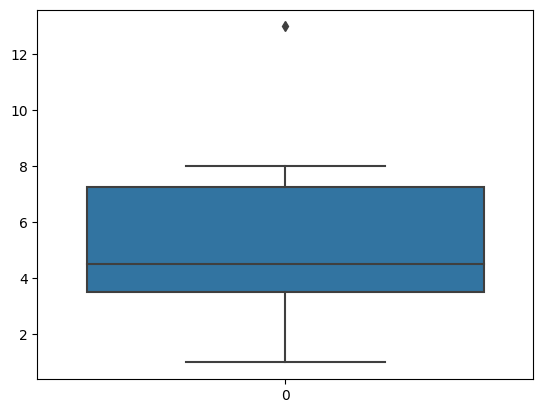

In [17]:
# Your response here. 
import seaborn as sns 
sns.boxplot(parties_df["Attend"])

In [18]:
out = np.where(parties_df["Attend"]>12)[0]
out

array([7], dtype=int64)

In [19]:
parties_df.drop(index= out, inplace=True)


In [20]:
parties_df

,Invite,Attend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


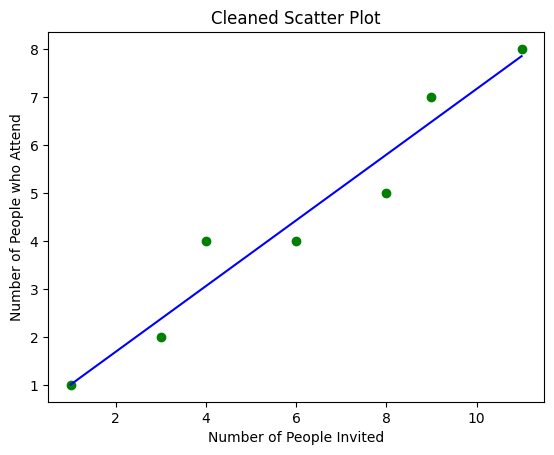

In [21]:
new_x = parties_df[["Invite"]]
new_y = parties_df["Attend"]

model_cleaned = linear_model.LinearRegression()
model_cleaned.fit(new_x, new_y)
regression_line_cleaned = model_cleaned.intercept_ + model_cleaned.coef_[0] * new_x

plt.scatter(parties_df["Invite"], parties_df["Attend"], color='green')
plt.title('Cleaned Scatter Plot')
plt.xlabel("Number of People Invited")
plt.ylabel("Number of People who Attend")
plt.plot(new_x, regression_line_cleaned, c="blue")

plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [22]:
# Your response here. 
